Implement PCA using the concept of covariance, eigen vectors, eigen values, and sheer plot

In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [20]:
data=pd.read_csv('diabetes.csv')
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [21]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

In [22]:
cov_matrix = np.cov(data_scaled, rowvar=False)

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)


Eigenvalues:
 [2.09711056 1.73346726 1.03097228 0.87667054 0.76333832 0.68351839
 0.42036353 0.40498938]
Eigenvectors:
 [[-0.1284321  -0.59378583  0.01308692 -0.08069115  0.47560573 -0.19359817
  -0.58879003  0.11784098]
 [-0.39308257 -0.17402908 -0.46792282  0.40432871 -0.46632804 -0.09416176
  -0.06015291  0.45035526]
 [-0.36000261 -0.18389207  0.53549442 -0.05598649 -0.32795306  0.6341159
  -0.19211793 -0.01129554]
 [-0.43982428  0.33196534  0.2376738  -0.03797608  0.48786206 -0.00958944
   0.28221253  0.5662838 ]
 [-0.43502617  0.25078106 -0.33670893  0.34994376  0.34693481  0.27065061
  -0.13200992 -0.54862138]
 [-0.45194134  0.1009598   0.36186463 -0.05364595 -0.25320376 -0.68537218
  -0.03536644 -0.34151764]
 [-0.27061144  0.122069   -0.43318905 -0.8336801  -0.11981049  0.08578409
  -0.08609107 -0.00825873]
 [-0.19802707 -0.62058853 -0.07524755 -0.0712006   0.10928996  0.03335717
   0.71208542 -0.21166198]]


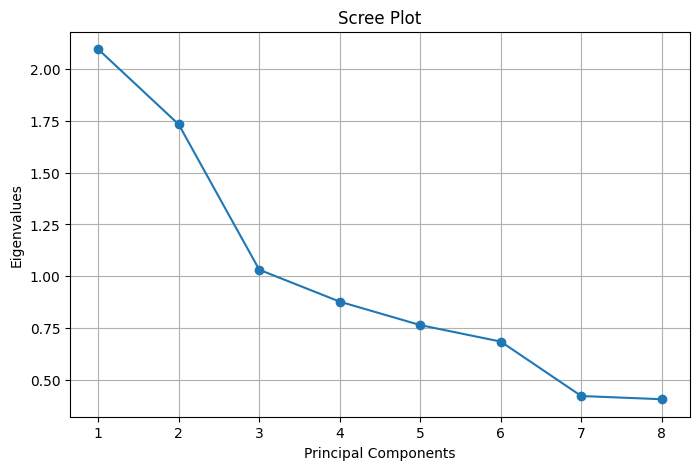

In [23]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot')
plt.grid()
plt.show()


In [24]:
k = 2
selected_eigenvectors = eigenvectors[:, :k]

X_pca = data_scaled @ selected_eigenvectors

df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca["Outcome"] = data["Outcome"]
print(df_pca)


          PC1       PC2  Outcome
0   -1.068503 -1.234895        1
1    1.121683  0.733852        0
2    0.396477 -1.595876        1
3    1.115781  1.271241        0
4   -2.359334  2.184819        1
..        ...       ...      ...
763 -1.562085 -1.923150        0
764  0.100405  0.614181        0
765  0.283475 -0.097065        0
766  1.060324 -0.837062        1
767  0.839892  1.151755        0

[768 rows x 3 columns]


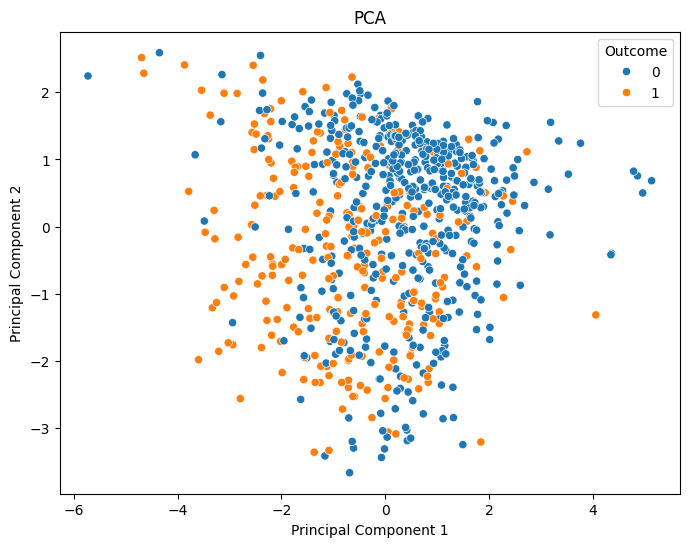

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=df_pca["Outcome"])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA")
plt.show()